<a href="https://colab.research.google.com/github/OnyedikachiOnwuachuke/ADS1/blob/main/ShootingStars9ja_Spaceship_Titanic_Kaggle_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Import the Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
!pip install h2o
import h2o
from h2o.automl import H2OAutoML

In [57]:
# Loading the datasets
train_data = "https://raw.githubusercontent.com/ShootingStars9ja/Kaggle-Challenge-Spaceship-Titanic/main/train.csv?token=GHSAT0AAAAAACT6XUA6XYIKXQ2ZAR5AZOIGZUAN6LQ"
df_train = pd.read_csv(train_data)
df_train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [58]:
test_data = "https://raw.githubusercontent.com/ShootingStars9ja/Kaggle-Challenge-Spaceship-Titanic/main/test.csv?token=GHSAT0AAAAAACT6XUA6XDLCHYXD3UTHXDDAZUAN65A"
df_test = pd.read_csv(test_data)
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [59]:
sample_data = "https://raw.githubusercontent.com/ShootingStars9ja/Kaggle-Challenge-Spaceship-Titanic/main/sample_submission.csv?token=GHSAT0AAAAAACT6XUA6POMYZVSLEUVTLP4EZUAN7TA"
df_sample = pd.read_csv(sample_data)
df_sample.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [20]:
# The necessary information of our train dataset and summary statistics
df_train.info()
df_train.describe()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


(8693, 14)

In [21]:
# Checking for duplicates in the dataset
df_train.duplicated().sum()


0


Missing values in the training Data:
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


<Axes: >

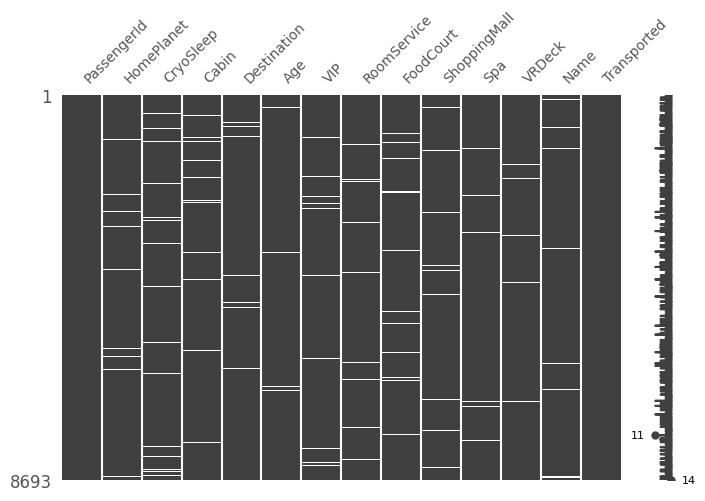

In [63]:
# checking for missing value in the train dataset
print("\nMissing values in the training Data:")
missing_values = df_train.isnull().sum()
print(missing_values[missing_values > 0])

# Visualising the missing values for better insights and understanding
msno.matrix(df_train,figsize=(8,5),fontsize=10)

In [64]:
# Checking the percentage of the missing values
print("\nPercentage of Missing Data:")
print((missing_values / len(df_train)) * 100)


Percentage of Missing Data:
PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


###### The percentage of the missing data are quite uniformly distributed across the different features which each having around 2%.
###### We will be handling these missing values appropriately so that we can build a robust model.

In [65]:
# We will be creating imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# The columns to impute
num_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
cat_columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

# Imputing the numeric columns
df_train[num_columns] = num_imputer.fit_transform(df_train[num_columns])

# Imputing the categorical columns
df_train[cat_columns] = cat_imputer.fit_transform(df_train[cat_columns])

# Checking if any missing values remain
print("Missing values after imputation:")
print(df_train.isnull().sum())


Missing values after imputation:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


**Visualizations of Data Distribution**



Transported
True     50.362361
False    49.637639
Name: proportion, dtype: float64

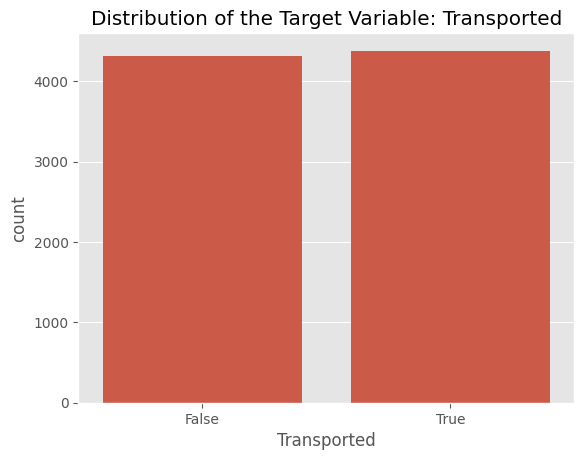

In [66]:
# Checking the distribution of the target variable
plt.style.use('ggplot')
sns.countplot(x='Transported', data=df_train).set_title('Distribution of the Target Variable: Transported')
df_train['Transported'].value_counts(normalize=True) * 100

Text(0.5, 1.0, 'Distribution of Numerical Columns')

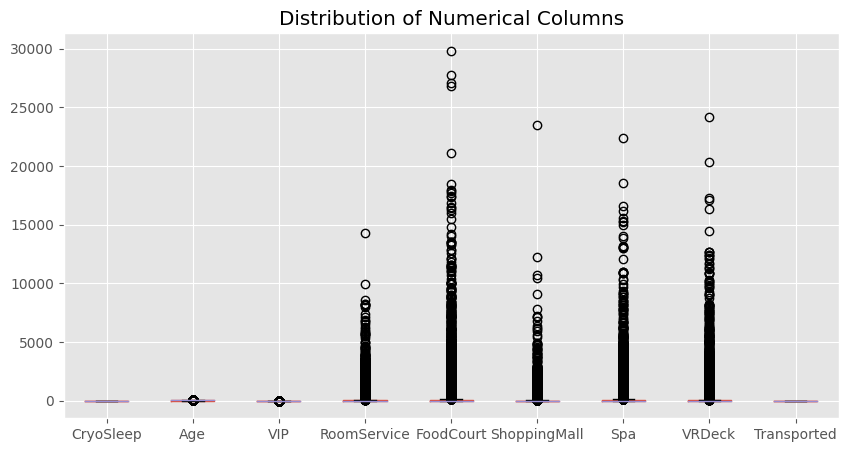

In [32]:
# Checking the distribution of the numerical variables using a box plot
df_train.boxplot(figsize=(10, 5)).set_title('Distribution of Numerical Columns')


In [67]:
# Converting 'CryoSleep' and 'VIP' to boolean
df_train['CryoSleep'] = df_train['CryoSleep'].astype('bool')
df_train['VIP'] = df_train['VIP'].astype('bool')

In [26]:
# confirming changes
print(df_train.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [27]:
# We need to exclude 'PassengerId', 'Name', and any other non-relevant object type columns
columns_to_exclude = ['PassengerId', 'Name', 'HomePlanet', 'Cabin', 'Destination']
df_numeric = df_train.drop(columns=columns_to_exclude)

In [28]:
# Ensuring that all remaining columns are numeric or boolean
for column in df_numeric.columns:
    if df_numeric[column].dtype == 'object':
        df_numeric[column] = pd.to_numeric(df_numeric[column], errors='coerce')

# Checking data types to confirm all are numeric or boolean
print("Data types after conversion:")
print(df_numeric.dtypes)

Data types after conversion:
CryoSleep          bool
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object


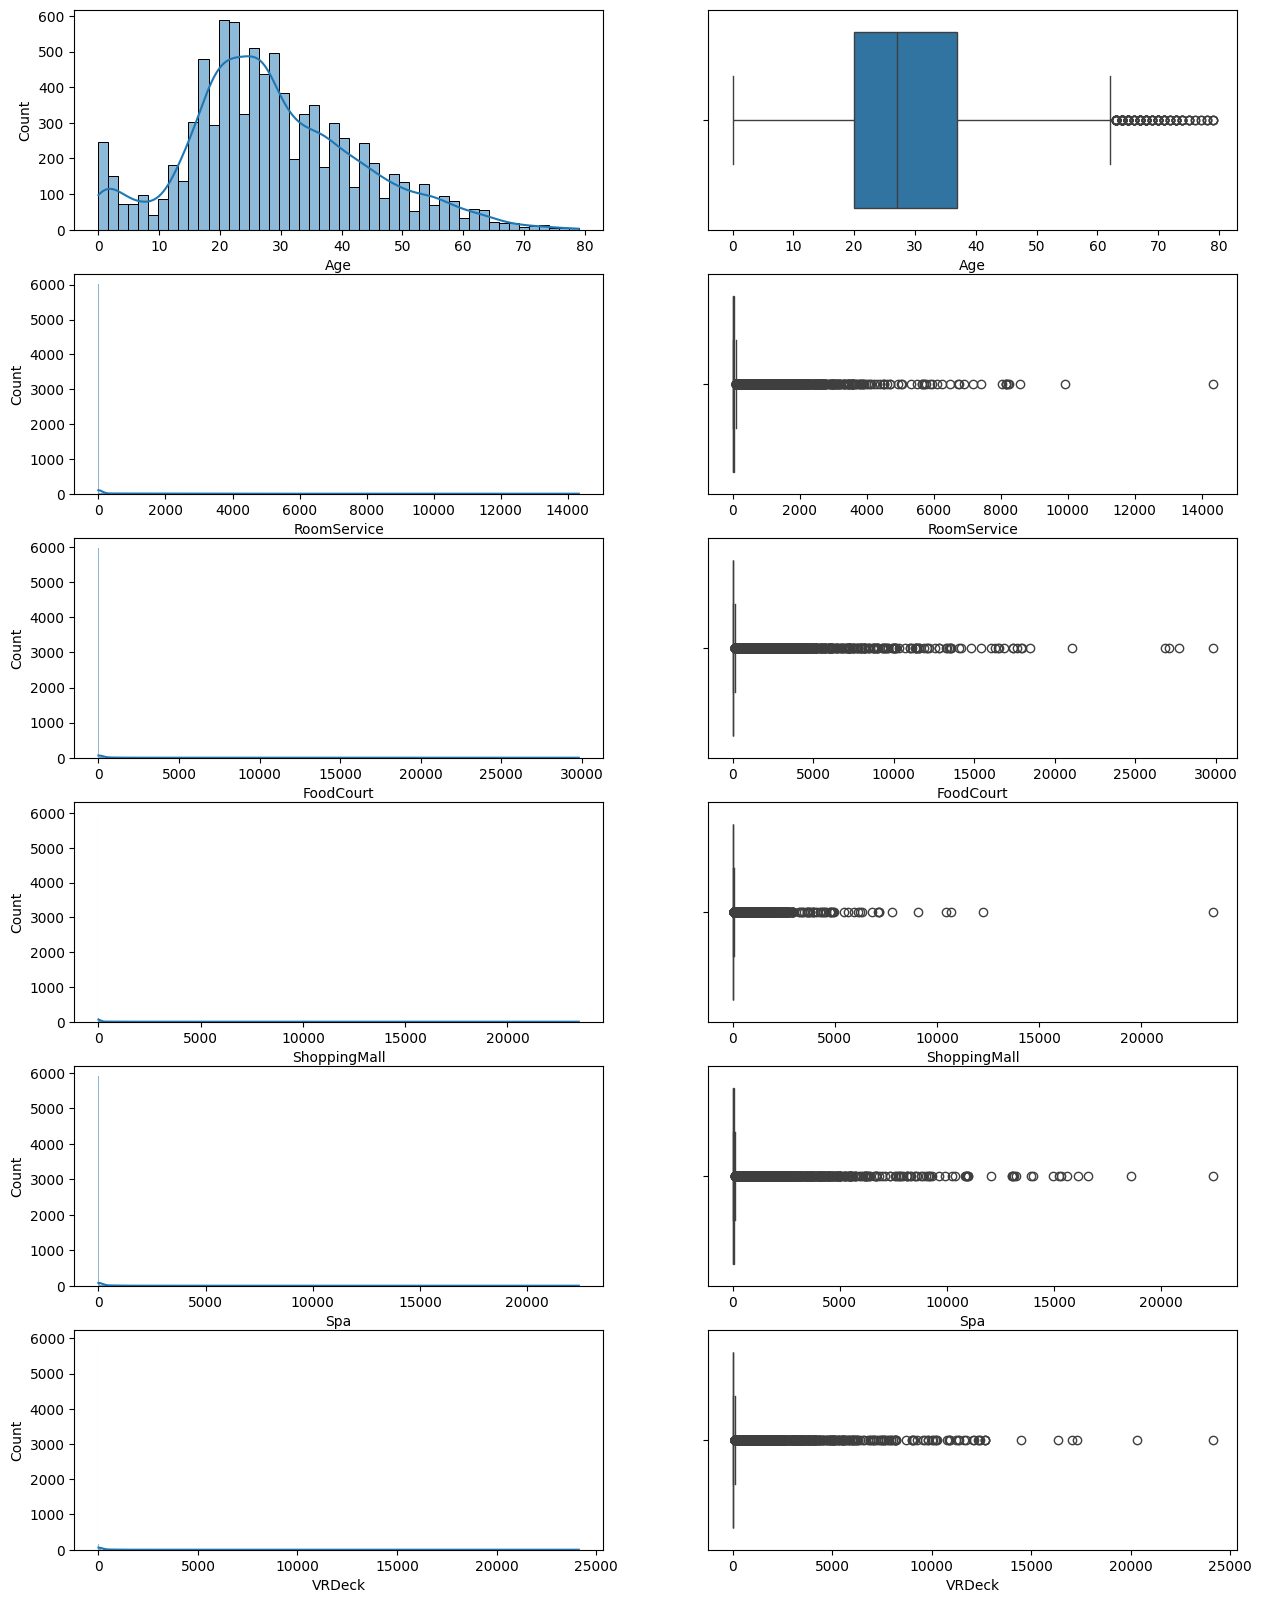

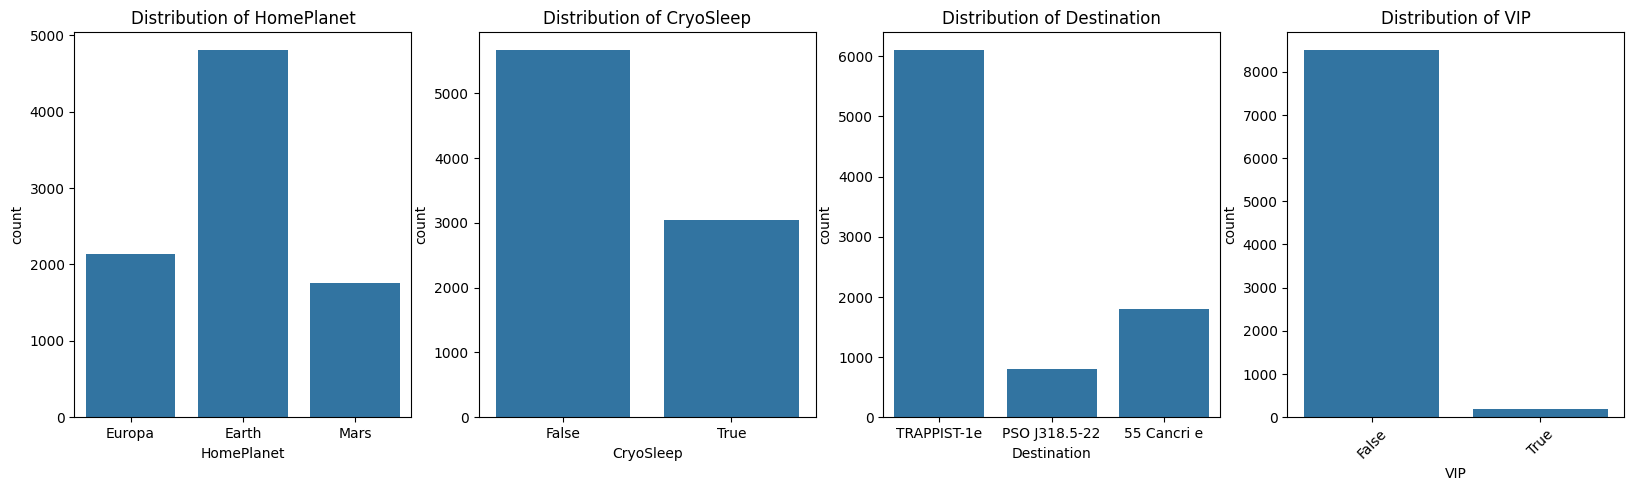

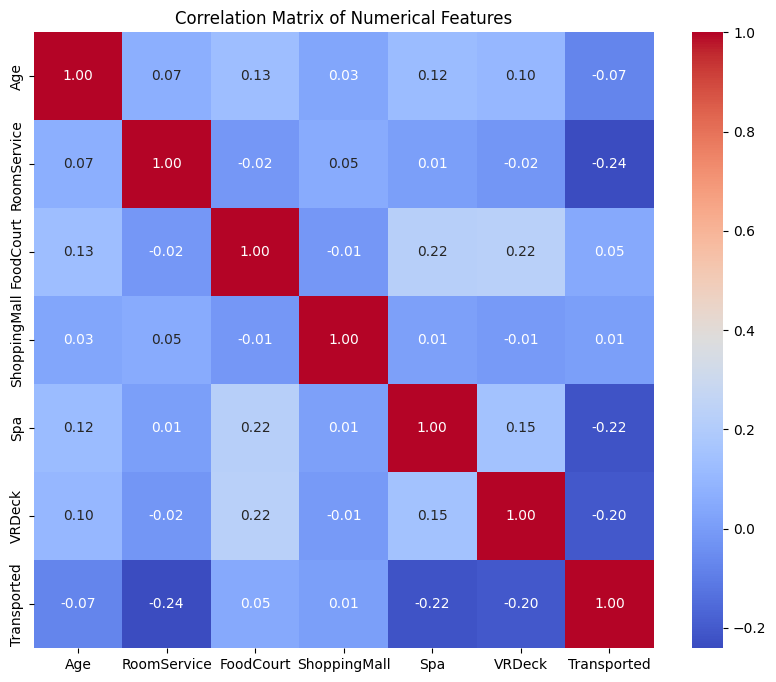

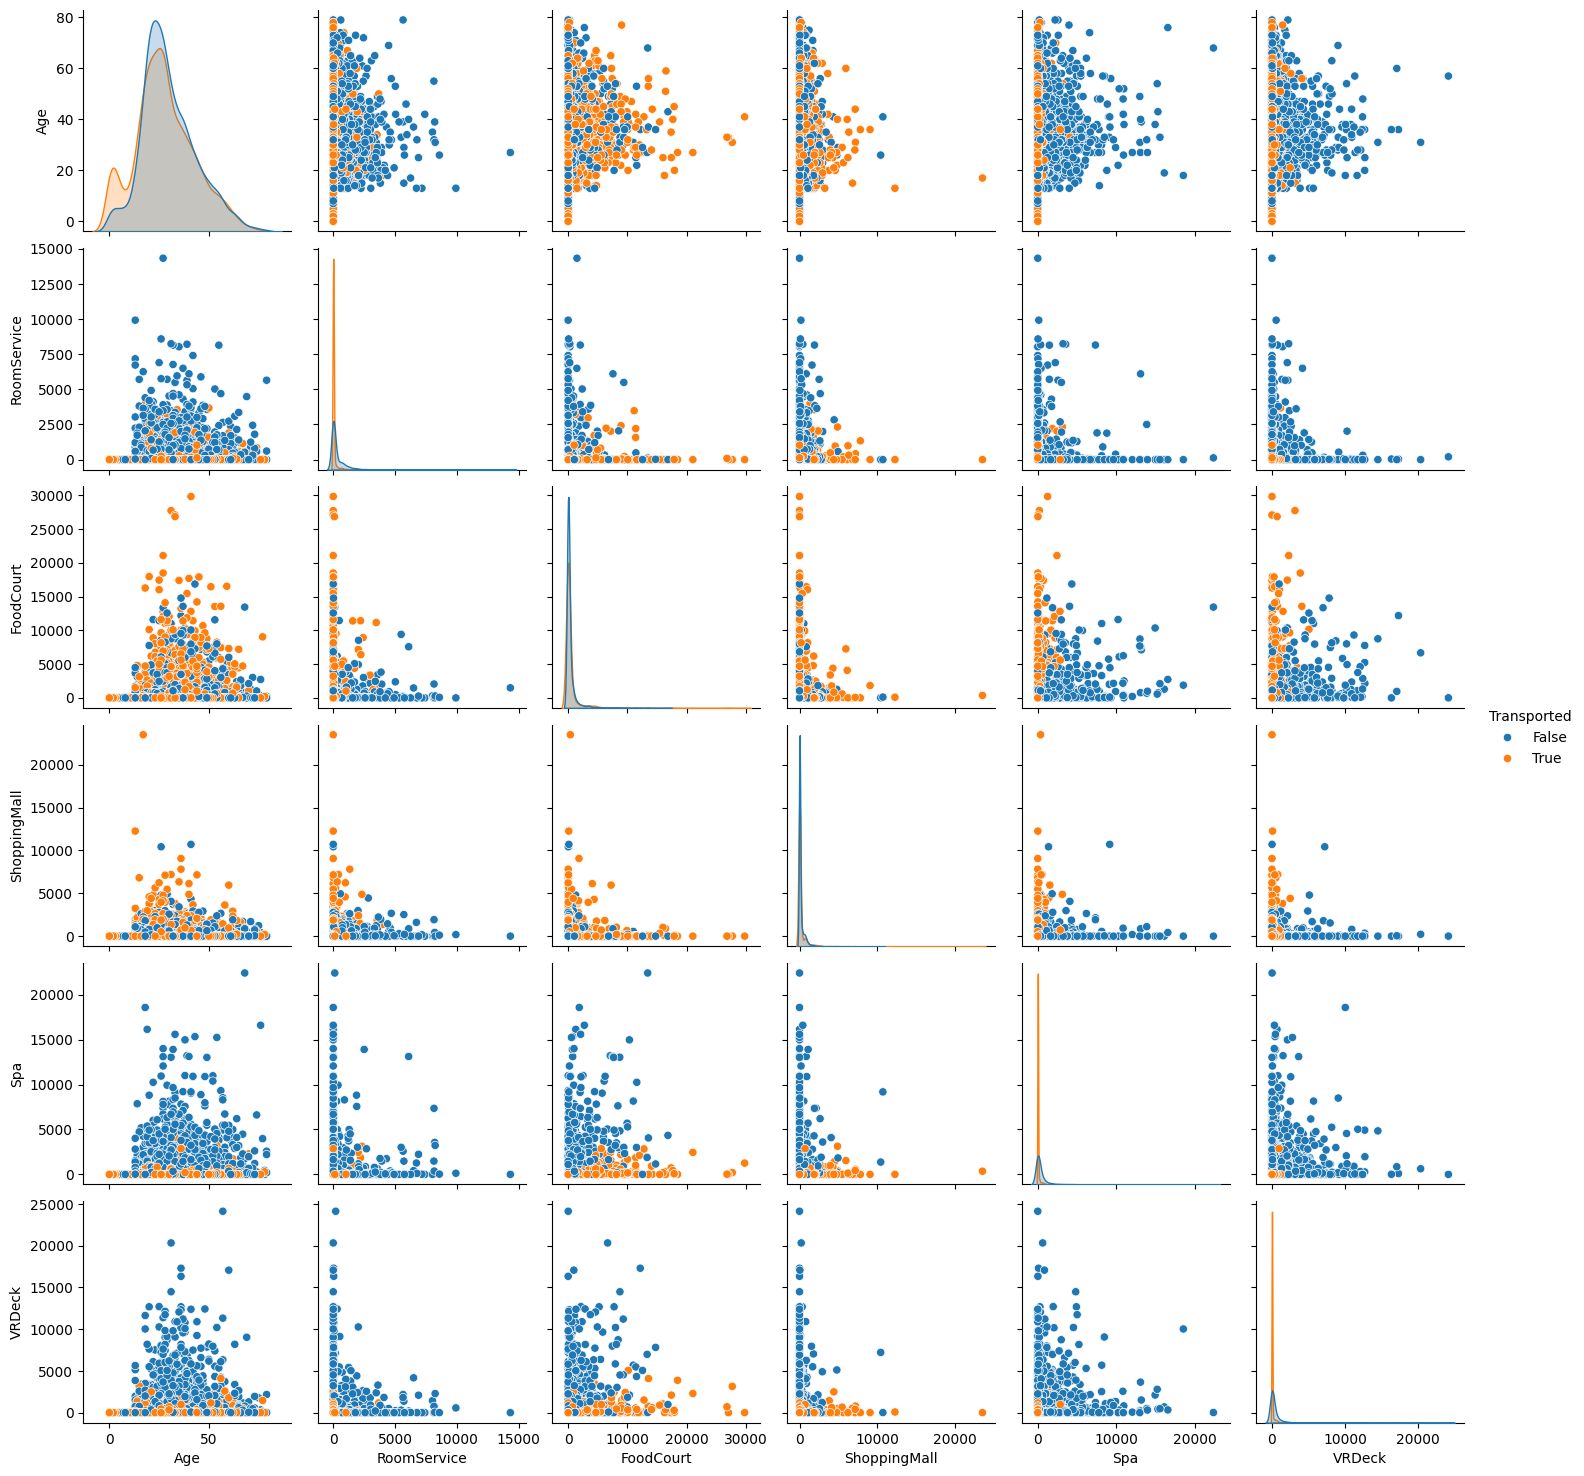

In [29]:
# First the Numeric features
numeric_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
fig, ax = plt.subplots(len(numeric_features), 2, figsize=(15, 20))
for i, feature in enumerate(numeric_features):
    if df_train[feature].dtype in ['float64', 'int64']:
      sns.histplot(df_train[feature].dropna(), kde=True, ax=ax[i, 0])
      sns.boxplot(x=feature, data=df_train, ax=ax[i, 1])
    else:
        print(f"Skipping {feature} as it's not numeric.")

# then, the Categorical features
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
fig, ax = plt.subplots(1, len(categorical_features), figsize=(20, 5))
for i, feature in enumerate(categorical_features):
  if feature in df_train.columns:
    sns.countplot(x=feature, data=df_train, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')
    plt.xticks(rotation=45)


# Filtering the dataframe to only numeric types for correlation matrix
numeric_df = df_train.select_dtypes(include=[np.number])

# Re-add 'Transported' to numeric_df for plotting purposes
numeric_df['Transported'] = df_train['Transported']

# Pairwise relationships and correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')



# Scatter plots for continuous variables with Transported status
sns.pairplot(numeric_df, hue='Transported')
plt.show()




### **Insights from EDA**
**TARGET VARIABLE**
##### TRANSPORTED: The Distribution of the target Variable (Transported) shows that the data is fairly balanced, and does not require any method to balance the data.
**FEATURES VARIABLES**

 The Distribution of the numerical features variables shows extreme values are present in our data, indicating a skewed distribution for expenditure variables like RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck, whereas the Age variable shows a more uniform distribution without significant skewness.
##### AGE: The age data mostly clusters around a middle value with more younger than older people, showing a slight trend toward younger passengers. A few very old passengers stand out, but they are not very common.
##### Room Service: Most people aren ot spending money on room service. This is clear from most of the data clustering at the lowest values. However, there are a few cases where spending is unusually high.
##### FoodCourt: The situation in the food court is much like that in room service. While the majority of people spend very little, a small number of passengers do spend a lot, which pulls the average up.
##### ShoppingMall: Similarly, spending in the shopping mall is generally low, with a few people spending much more than average.
##### SPA : Spending on spa services shows a similar trend, it is generally low, with a small number of higher spenders.
##### VRDECK : Spending on the VRDeck is mostly minimal, but there are some exceptions where spending is high. This pattern is similar to the other luxury and recreational services onboard.
##### Home Planet: Most passengers come from Earth, with fewer from Europa and even fewer from Mars.
##### Cryosleep: Most people choose not to use cryosleep.
##### Destination: TRAPPIST-1e is by far the preferred destination compared to PSO J318.5-22 and 55 Cancri e.
##### VIP: Only a small group of passengers are classified as VIPs


### Correlation Matrix of the numerical Features:

##### Age and Spending: Older passengers tend to spend more on services like the FoodCourt and VRDeck.
##### Spending Category: People who spend in one area often spend in others too. For instance, those who spend at the FoodCourt also tend to spend at the Spa.
##### Transportation Outcome: Passengers who were transported tend to spend less in areas such as RoomService, Spa, and VRDeck.


### Insights from the Pair Plot

##### Age and Transportation: The age graph shows that both young and old passengers are mixed in whether they were transported or not, but there's a slight trend of younger passengers being transported more often.
##### Spending Behaviour and Transportation: Passengers who weren't transported tend to spend more on things like room service, spas, and VRDecks. This could mean that people who use these services more might be on the trip for leisure or other reasons that don’t involve moving to a new place.
##### Correlation of Spending with Age: Older passengers generally spend more across services like room service, food courts, and others. This trend is clear when looking at how age relates to spending in various plots.


**DATA PRE-PROCESSING**

In [68]:
# Encoding the Catgorical Data
# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = encoder.fit_transform(df_train[cat_columns])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(cat_columns))
# Concatenate the original DataFrame with the new DataFrame containing the encoded variables
df_train = pd.concat([df_train.drop(cat_columns, axis=1), encoded_df], axis=1)
df_train.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,...,Name_Zinopus Spandisket,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Flesping,Name_Zubeneb Pasharne
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,False,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,True,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,False,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,True,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# Scaling the numerical Variables
# Standardizing the numeric columns to have mean = 0 and standard deviation = 1
scaler = StandardScaler()
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])


In [35]:
# Splitting the Data
# 'Transported' is the target variable
X = df_train.drop('Transported', axis=1)
y = df_train['Transported']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Displaying the final data types and checking for any remaining issues
print(df_train.info())
print("\nSample data:")
print(df_train.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Columns: 15045 entries, PassengerId to Name_Zubeneb Pasharne
dtypes: bool(1), float64(15043), object(1)
memory usage: 997.8+ MB
None

Sample data:
  PassengerId       Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0     0001_01  0.711945    -0.333105  -0.281027     -0.283579 -0.270626   
1     0002_01 -0.334037    -0.168073  -0.275387     -0.241771  0.217158   
2     0003_01  2.036857    -0.268001   1.959998     -0.283579  5.695623   
3     0003_02  0.293552    -0.333105   0.523010      0.336851  2.687176   
4     0004_01 -0.891895     0.125652  -0.237159     -0.031059  0.231374   

     VRDeck  Transported  HomePlanet_Europa  HomePlanet_Mars  ...  \
0 -0.263003        False                1.0              0.0  ...   
1 -0.224205         True                0.0              0.0  ...   
2 -0.219796        False                1.0              0.0  ...   
3 -0.092818        False                1.0         

**Model Selection Using the H2O AutoML**

In [37]:
# initializing the H2O cluster

h2o.init()




Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvt7jz1ai
  JVM stdout: /tmp/tmpvt7jz1ai/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvt7jz1ai/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_b1e8p9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [38]:
# Converting the DataFrames to H2O Frames
train_hf = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test_hf = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [39]:
# Defining the target variable and the features
target = 'Transported'
features = [col for col in train_hf.columns if col != target]

In [40]:
# Creating and training the AutoML model
aml = H2OAutoML(max_models=10,
                seed=1234,
                max_runtime_secs=1800,
                sort_metric='AUC')

aml.train(x=features, y=target, training_frame=train_hf)

AutoML progress: |█
15:59:54.840: _train param, Dropping bad and constant columns: [Name_Idarry Nichaner, Cabin_F/413/P, Cabin_F/413/S, Cabin_G/113/P, Cabin_G/366/P, Name_Bakix Razo, Cabin_G/509/S, Name_Pies Welto, Cabin_F/1229/S, Cabin_G/509/P, Name_Joyton Hewson, Cabin_F/666/P, Cabin_C/142/P, Cabin_F/1086/P, Name_Wandy Deckerson, Name_Wenny Bushafford, Name_Luzel Willy, Cabin_G/1130/S, Name_Jaimer Pacerty, Cabin_F/786/P, Name_Losp Reake, Cabin_G/486/P, Cabin_G/10/S, Name_Weino Icablebat, Name_Whark Cooki, Name_Elanda Garnes, Name_Dandy Connon, Cabin_G/23/S, Name_Dunch Mepie, Cabin_A/61/S, Name_Denny Russon, Name_Jenn Lynnerett, Name_Zubeneb Flesping, Name_Ankabit Parbleake, Name_Jurs Binie, Cabin_G/1383/S, Cabin_G/1383/P, Name_Edaruma Bacistion, Cabin_F/1491/S, Cabin_G/869/P, Name_Done Ingston, Name_Cindee Flé, Name_Clues Kidne, Name_Canonon Dompreced, Name_Eduana Rames, Cabin_E/298/S, Cabin_G/473/P, Name_Thabius Stacketent, Cabin_B/94/S, Cabin_G/1156/P, Cabin_G/473/S, Cabin_G/220/S,

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20240629_155725


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.11619436787731387
RMSE: 0.3408729497588711
LogLoss: 0.36393612867012076
Mean Per-Class Error: 0.17171597358363333
AUC: 0.91863206198007
AUCPR: 0.9193427644688572
Gini: 0.8372641239601399

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43337315718332925
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  1833     589     0.2432   (589.0/2422.0)
True   246      2208    0.1002   (246.0/2454.0)
Total  2079     2797    0.1712   (835.0/4876.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.433373     0.840983  208
max f2                       0.180679     0.903569  299
max f0point5                 0.687521     0.845342  121
max accuracy                 0.513243     0.831419  180
max precision                0.99513      1         0
max recall                   0.0366112    1         379
max specificity              0.99513      1         0
max absolute_mcc             0.44663      0.664698  203
max min_per_class_accuracy   0.533501     0.825764  174
max mean_per_class_accuracy  0.513243     0.831337  180
max tns                      0.99513      2422      0
max fns                      0.99513      2453      0
max fps                      0.00319794   2422      399
max tps                      0.0366112    2454      379
max tnr                      0.99513      1         0
max fnr                      0.99513      0.999593  0
max fpr                      0.00319794   1         399
max tpr                      0.0366112    1         379

Gains/Lift Table: Avg response rate: 50.33 %, avg score: 50.46 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0106645                   0.990031           1.98696    1.98696            1                0.990971  1                           0.990971            0.0211899       0.0211899                  98.696    98.696             0.0211899
2        0.0225595                   0.988071           1.9527     1.9689             0.982759         0.988765  0.990909                    0.989808            0.0232274       0.0444173                  95.2702   96.8897            0.0440044
3        0.0307629                   0.98752            1.98696    1.97371            1                0.987826  0.993333                    0.989279            0.0162999       0.0607172                  98.696    97.3714            0.0603043
4        0.040402                    0.98644            1.98696    1.97687            1                0.986795  0.994924                    0.988687            0.0191524       0.0798696                  98.696    97.6874            0.0794567
5        0.0506563                   0.985194           1.98696    1.97892            1                0.985867  0.995951                    0.988116            0.0203749       0.100244                   98.696    97.8916            0.0998316
6        0.100697                    0.974935           1.97067    1.97482            0.991803         0.980834  0.99389                     0.984497            0.0986145       0.198859                   97.0674   97.482             0.19762
7        0.150328                    0.927831           1.94591   

In [44]:
# Viewing the AutoML Leaderboard
lb = aml.leaderboard
print(lb)

model_id                                 auc    logloss     aucpr    mean_per_class_error      rmse       mse
XGBoost_1_AutoML_1_20240629_155725  0.86252    0.463781  0.873645                0.226851  0.390415  0.152424
GBM_1_AutoML_1_20240629_155725      0.856381   0.490902  0.866679                0.21973   0.398651  0.158923
GLM_1_AutoML_1_20240629_155725      0.785742   0.575735  0.768368                0.265512  0.44033   0.193891
[3 rows x 7 columns]



In [45]:
# getting the best model (the leader)
leader_model = aml.leader

In [46]:
# Predicting the best model on the test set and evaluating it's performance
predictions = leader_model.predict(test_hf)
performance = leader_model.model_performance(test_hf)
print(performance)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.15077358116206957
RMSE: 0.38829573930455324
LogLoss: 0.4596115876412832
Mean Per-Class Error: 0.21507940917352553
AUC: 0.8647233047338608
AUCPR: 0.8785430151500816
Gini: 0.7294466094677217

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47281455993652344
       False    True    Error    Rate
-----  -------  ------  -------  --------------
False  624      237     0.2753   (237.0/861.0)
True   136      742     0.1549   (136.0/878.0)
Total  760      979     0.2145   (373.0/1739.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.472815     0.799138  206
max f2                       0.0775906    0.861139  356
max f0point5                 0.607636     0.794959  159


In [47]:
# Showing the learning curve to visualize the model's performance

def plot_learning_curve(aml, train_hf, test_hf, target):
    fractions = [0.1, 0.25, 0.5, 0.75, 1.0]
    train_scores = []
    test_scores = []

    if not h2o.cluster().is_running():
        h2o.init()

    for frac in fractions:
        # Sample the training data
        sampled_train, _ = train_hf.split_frame(ratios=[frac], seed=1234)

        # Creating and training the AutoML model
        aml.train(x=features, y=target, training_frame=sampled_train)

        # Evaluating the model on the training subset and test set
        train_perf = aml.leader.model_performance(sampled_train)
        test_perf = aml.leader.model_performance(test_hf)

        train_scores.append(train_perf.auc())
        test_scores.append(test_perf.auc())

    # Plotting the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(fractions, train_scores, label='Train AUC')
    plt.plot(fractions, test_scores, label='Test AUC')
    plt.xlabel('Fraction of Training Data Used')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

features = [col for col in train_hf.columns if col != target]

# Calling the function to plot the learning curve
plot_learning_curve(aml, train_hf, test_hf, 'Transported')


H2OServerError: HTTP 500 Server Error:


In [52]:
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

def plot_learning_curve_accuracy(aml, train_hf, test_hf, target):
    fractions = [0.1, 0.25, 0.5, 0.75, 1.0]
    train_scores = []
    test_scores = []

    features = [col for col in train_hf.columns if col != target]

    for frac in fractions:
        try:
            # Sample the training data
            sampled_train, _ = train_hf.split_frame(ratios=[frac], seed=1234)
            print(f"Sampled training data with fraction {frac}: {sampled_train.shape}")

            # Creating and training the AutoML model
            aml.train(x=features, y=target, training_frame=sampled_train)

            # Evaluating the model on the training subset and test set
            train_perf = aml.leader.model_performance(sampled_train)
            test_perf = aml.leader.model_performance(test_hf)

            train_accuracy = train_perf.accuracy()[0][1]
            test_accuracy = test_perf.accuracy()[0][1]

            train_scores.append(train_accuracy)
            test_scores.append(test_accuracy)

            print(f"Fraction {frac}: Train Accuracy = {train_accuracy}, Test Accuracy = {test_accuracy}")
        except Exception as e:
            print(f"Error at fraction {frac}: {e}")
            train_scores.append(None)
            test_scores.append(None)

    # Check if any valid scores were appended
    if any(train_scores) and any(test_scores):
        # Plotting the learning curve
        plt.figure(figsize=(10, 6))
        plt.plot(fractions, train_scores, label='Train Accuracy', marker='o')
        plt.plot(fractions, test_scores, label='Test Accuracy', marker='o')
        plt.xlabel('Fraction of Training Data Used')
        plt.ylabel('Accuracy')
        plt.title('Learning Curve - Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("No valid Accuracy scores to plot.")

# Calling the function to plot the learning curve
plot_learning_curve_accuracy(aml, train_hf, test_hf, target)


Error at fraction 0.1: HTTP 500 Server Error:
Server error water.util.DistributedException:
  Error: DistributedException from /127.0.0.1:54321: 'Java heap space'
  Request: None
  Stacktrace: DistributedException from /127.0.0.1:54321: 'Java heap space', caused by java.lang.OutOfMemoryError: Java heap space
      water.MRTask.getResult(MRTask.java:660)
      water.MRTask.getResult(MRTask.java:670)
      water.MRTask.doAll(MRTask.java:530)
      water.MRTask.doAll(MRTask.java:497)
      water.fvec.Frame.deepSlice(Frame.java:1273)
      water.rapids.ast.prims.mungers.AstRowSlice.apply(AstRowSlice.java:107)
      water.rapids.ast.prims.mungers.AstRowSlice.apply(AstRowSlice.java:20)
      water.rapids.ast.AstExec.exec(AstExec.java:63)
      water.rapids.ast.prims.assign.AstTmpAssign.apply(AstTmpAssign.java:48)

Error at fraction 0.25: HTTP 500 Server Error:
Server error water.util.DistributedException:
  Error: DistributedException from /127.0.0.1:54321: 'Java heap space'
  Request: None


Exception ignored in: <function ExprNode.__del__ at 0x79ebfe80a950>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/h2o/expr.py", line 204, in __del__
    ExprNode.rapids("(rm {})".format(self._cache._id))
  File "/usr/local/lib/python3.10/dist-packages/h2o/expr.py", line 258, in rapids
    return h2o.api("POST /99/Rapids", data={"ast": expr, "session_id": h2o.connection().session_id})
  File "/usr/local/lib/python3.10/dist-packages/h2o/h2o.py", line 123, in api
    return h2oconn.request(endpoint, data=data, json=json, filename=filename, save_to=save_to)
  File "/usr/local/lib/python3.10/dist-packages/h2o/backend/connection.py", line 499, in request
    return self._process_response(resp, save_to)
  File "/usr/local/lib/python3.10/dist-packages/h2o/backend/connection.py", line 858, in _process_response
    raise H2OServerError("HTTP %d %s:\n%s" % (status_code, response.reason, data))
h2o.exceptions.H2OServerError: HTTP 500 Server Error:
<html>
<head>

Error at fraction 0.75: HTTP 500 Server Error:
Server error water.util.DistributedException:
  Error: DistributedException from /127.0.0.1:54321: 'Java heap space'
  Request: None
  Stacktrace: DistributedException from /127.0.0.1:54321: 'Java heap space', caused by java.lang.OutOfMemoryError: Java heap space
      water.MRTask.getResult(MRTask.java:660)
      water.MRTask.getResult(MRTask.java:670)
      water.MRTask.doAll(MRTask.java:530)
      water.MRTask.doAll(MRTask.java:497)
      water.fvec.Frame.deepSlice(Frame.java:1273)
      water.rapids.ast.prims.mungers.AstRowSlice.apply(AstRowSlice.java:107)
      water.rapids.ast.prims.mungers.AstRowSlice.apply(AstRowSlice.java:20)
      water.rapids.ast.AstExec.exec(AstExec.java:63)
      water.rapids.ast.prims.assign.AstTmpAssign.apply(AstTmpAssign.java:48)

Error at fraction 1.0: Ratios must add up to less than 1.0
No valid Accuracy scores to plot.


Variable Importance Plot


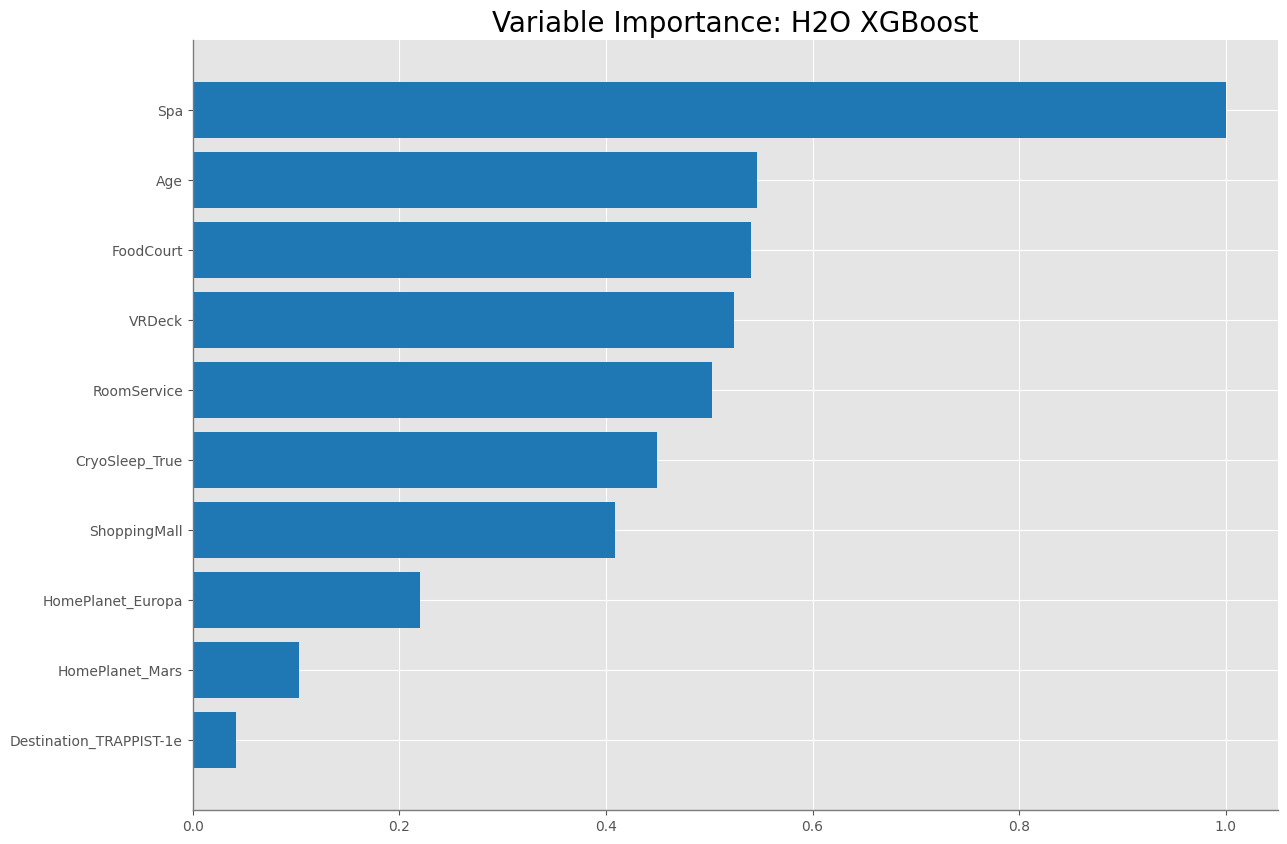

<Figure size 640x480 with 0 Axes>

SHAP Summary Plot


H2OServerError: HTTP 500 Server Error:
Server error water.util.DistributedException:
  Error: DistributedException from /127.0.0.1:54321: 'Java heap space'
  Request: None
  Stacktrace: DistributedException from /127.0.0.1:54321: 'Java heap space', caused by java.lang.OutOfMemoryError: Java heap space
      water.MRTask.getResult(MRTask.java:660)
      water.MRTask.getResult(MRTask.java:670)
      water.MRTask.doAll(MRTask.java:530)
      water.MRTask.doAll(MRTask.java:497)
      water.rapids.ast.prims.mungers.AstRowSlice.apply(AstRowSlice.java:99)
      water.rapids.ast.prims.mungers.AstRowSlice.apply(AstRowSlice.java:20)
      water.rapids.ast.AstExec.exec(AstExec.java:63)
      water.rapids.ast.prims.assign.AstTmpAssign.apply(AstTmpAssign.java:48)
      water.rapids.ast.prims.assign.AstTmpAssign.apply(AstTmpAssign.java:17)


In [61]:
import h2o
import matplotlib.pyplot as plt
from h2o.automl import H2OAutoML

# Assuming the H2O cluster is initialized and the AutoML model is trained

# 1. Variable Importance Plot
print("Variable Importance Plot")
leader_model.varimp_plot()
plt.show()

# 2. SHAP Summary Plot
print("SHAP Summary Plot")
shap_summary = leader_model.shap_summary_plot(train_hf)
plt.show()

# 3. Partial Dependence Plot for 'Age' Feature
print("Partial Dependence Plot for 'Age' Feature")
pdp = leader_model.partial_plot(data=train_hf, cols=['Age'])
plt.show()

# 4. Individual Prediction Explanation (using SHAP values)
# Note: If the `explain_row` function is not available, we can use other interpretability methods.

# Explanation for a specific row (e.g., the first row of the test set)
row_to_explain = test_hf[0, :]
shap_explain_row = leader_model.predict_contributions(row_to_explain)
print(shap_explain_row)

# If you still want to visualize the explanations, use SHAP library directly (if supported)
import shap

# Assuming we have the local version of the leader model
explainer = shap.Explainer(leader_model.predict, train_hf.as_data_frame())
shap_values = explainer(test_hf.as_data_frame().iloc[0])

shap.plots.waterfall(shap_values)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcgysepbv
  JVM stdout: /tmp/tmpcgysepbv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpcgysepbv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_d7npkf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Variable Importance Plot


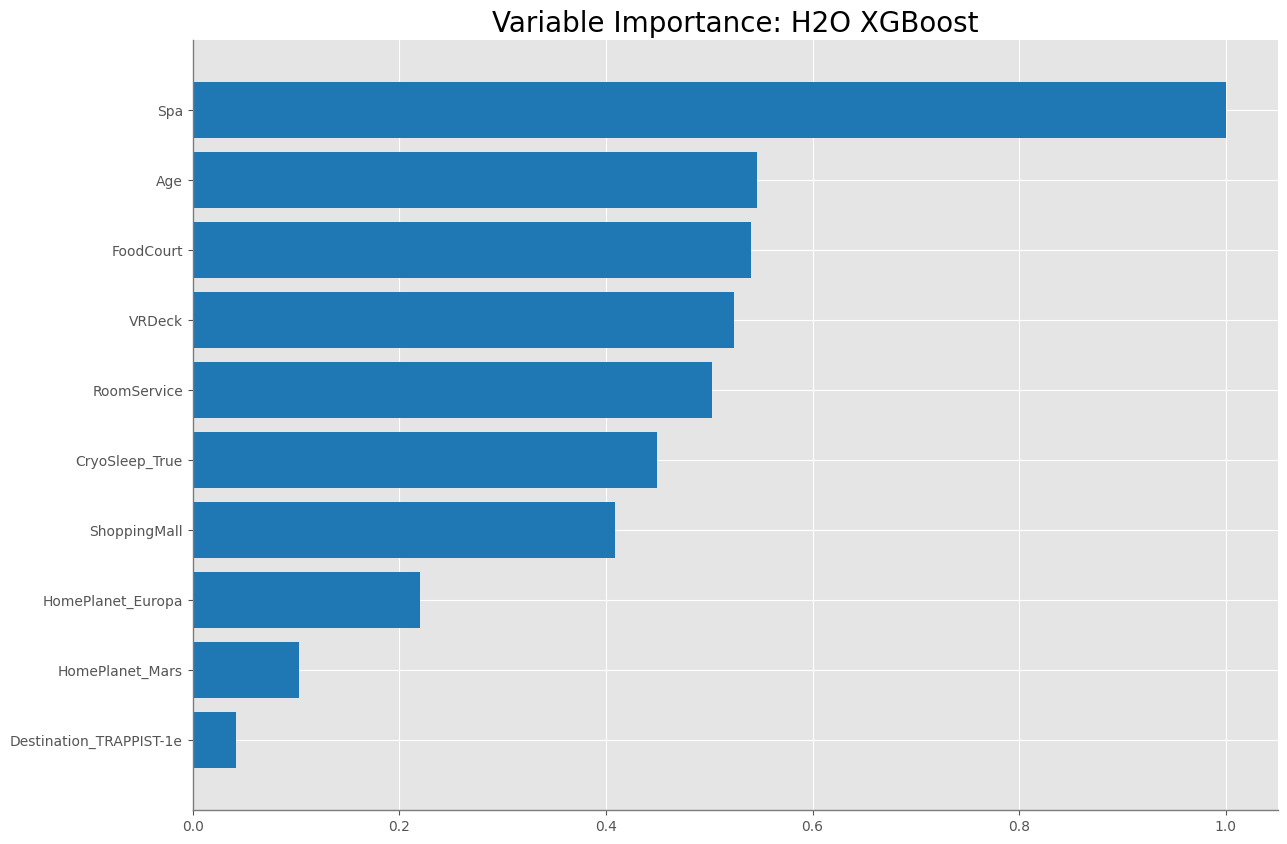

<Figure size 640x480 with 0 Axes>

SHAP Summary Plot


H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Name lookup of 'Key_Frame__upload_8192e28d47b0da7ef907d062d22b4599.hex' failed
  Request: POST /99/Rapids
    data: {'ast': '(tmp= py_41_sid_8e2f (rows (tmp= py_40_sid_8e2f (rows Key_Frame__upload_8192e28d47b0da7ef907d062d22b4599.hex [0:1000])) [0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899 900 901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917 918 919 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935 936 937 938 939 940 941 942 943 944 945 946 947 948 949 950 951 952 953 954 955 956 957 958 959 960 961 962 963 964 965 966 967 968 969 970 971 972 973 974 975 976 977 978 979 980 981 982 983 984 985 986 987 988 989 990 991 992 993 994 995 996 997 998 999]))', 'session_id': '_sid_8e2f'}


In [62]:
import h2o
import matplotlib.pyplot as plt
from h2o.automl import H2OAutoML

# Initialize H2O with increased memory allocation
h2o.init(max_mem_size='8G')  # Increase memory as needed, e.g., 8GB

# Assuming the AutoML model is already trained and train_hf, test_hf H2OFrames are created

# 1. Variable Importance Plot
print("Variable Importance Plot")
leader_model.varimp_plot()
plt.show()

# 2. SHAP Summary Plot
print("SHAP Summary Plot")
# If SHAP summary plot still runs out of memory, use a smaller subset
train_subset = train_hf[:1000, :]  # Using a smaller subset of 1000 rows
shap_summary = leader_model.shap_summary_plot(train_subset)
plt.show()

# 3. Partial Dependence Plot for 'Age' Feature
print("Partial Dependence Plot for 'Age' Feature")
pdp = leader_model.partial_plot(data=train_hf, cols=['Age'])
plt.show()

# 4. Individual Prediction Explanation (using SHAP values)
# Explanation for a specific row (e.g., the first row of the test set)
row_to_explain = test_hf[0, :]
shap_explain_row = leader_model.predict_contributions(row_to_explain)
print(shap_explain_row)

# If you still want to visualize the explanations, use SHAP library directly (if supported)
import shap

# Assuming we have the local version of the leader model
explainer = shap.Explainer(leader_model.predict, train_hf.as_data_frame())
shap_values = explainer(test_hf.as_data_frame().iloc[0])

shap.plots.waterfall(shap_values)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7924094307073031
Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.79      0.79       861
        True       0.79      0.80      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

